<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-Outline:" data-toc-modified-id="Chapter-Outline:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter Outline:</a></span></li><li><span><a href="#Recap" data-toc-modified-id="Recap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap</a></span></li><li><span><a href="#Chapter-Goals" data-toc-modified-id="Chapter-Goals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chapter Goals</a></span></li><li><span><a href="#Gaussian-Mixture-Models-(GMM)-Intuition" data-toc-modified-id="Gaussian-Mixture-Models-(GMM)-Intuition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gaussian Mixture Models (GMM) Intuition</a></span><ul class="toc-item"><li><span><a href="#Why-do-we-need-Expectation-Maximization,-why-bother-to-understand-it?" data-toc-modified-id="Why-do-we-need-Expectation-Maximization,-why-bother-to-understand-it?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Why do we need Expectation-Maximization, why bother to understand it?</a></span></li><li><span><a href="#Expectation-Maximization-Walkthrough-Example" data-toc-modified-id="Expectation-Maximization-Walkthrough-Example-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Expectation-Maximization Walkthrough Example</a></span><ul class="toc-item"><li><span><a href="#Create-Synthetic-Return-Data" data-toc-modified-id="Create-Synthetic-Return-Data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Create Synthetic Return Data</a></span></li><li><span><a href="#Code-Normal-Distribution-Class" data-toc-modified-id="Code-Normal-Distribution-Class-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Code Normal Distribution Class</a></span></li><li><span><a href="#Initialize-Expectation-Maximization-Algorithm" data-toc-modified-id="Initialize-Expectation-Maximization-Algorithm-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Initialize Expectation-Maximization Algorithm</a></span></li><li><span><a href="#Run-Expectation-Maximization-Algorithm" data-toc-modified-id="Run-Expectation-Maximization-Algorithm-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Run Expectation-Maximization Algorithm</a></span></li></ul></li></ul></li><li><span><a href="#Fitting-Mixture-Models-Using-Real-Data" data-toc-modified-id="Fitting-Mixture-Models-Using-Real-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fitting Mixture Models Using Real Data</a></span><ul class="toc-item"><li><span><a href="#Comparing-AIC-and-BIC-of-Different-numbers-of-Component-Mixtures" data-toc-modified-id="Comparing-AIC-and-BIC-of-Different-numbers-of-Component-Mixtures-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Comparing AIC and BIC of Different numbers of Component Mixtures</a></span></li><li><span><a href="#Choosing-The-Optimal-Number-of-Components-using-AIC/BIC" data-toc-modified-id="Choosing-The-Optimal-Number-of-Components-using-AIC/BIC-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Choosing The Optimal Number of Components using AIC/BIC</a></span></li></ul></li><li><span><a href="#Visualizing-Regimes" data-toc-modified-id="Visualizing-Regimes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualizing Regimes</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Chapter Outline:
1. Recap
2. Chapter Goals
3. Expectation-Maximization walkthrough
4. GMM application
5. Choosing Number of Components
6. GMM exploration
7. Conclusions

In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2

from IPython.display import display
from IPython.core.debugger import set_trace as bp
# import standard libs
from pathlib import PurePath, Path
import sys
import time
import os
import pickle
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# get project dir
pp = PurePath(Path.cwd()).parts[:-1]
pdir = PurePath(*pp)
data_dir = pdir/'data'
script_dir = pdir / 'scripts' 
sys.path.append(script_dir.as_posix())

# import python scientific stack
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import pandas_datareader.data as web
import numpy as np
import sklearn.mixture as mix
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as stats
from numba import jit
import math
import pymc3 as pm
from theano import shared, theano as tt
from multiprocessing import cpu_count

# import visual tools
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import plotnine as pn
import mizani.breaks as mzb
import mizani.formatters as mzf
import seaborn as sns
savefig_kwds=dict(dpi=300, bbox_inches='tight')
# import util libs
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from utils import cprint

# set globals
plt.style.use('seaborn-talk')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Bitstream Vera Sans'#'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7

blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)
RANDOM_STATE = 777

print()
%watermark -p pandas,pandas_datareader,numpy,sklearn,statsmodels,scipy,pymc3,matplotlib,seaborn,plotnine

2018-05-30T13:00:29-06:00

CPython 3.6.4
IPython 6.2.1

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.13.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


/media/bcr/HDD/anaconda3/envs/bayes_dash/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



pandas 0.23.0
pandas_datareader 0.6.0+21.gda18fbd
numpy 1.14.3
sklearn 0.19.1
statsmodels 0.9.0
scipy 1.1.0
pymc3 3.4.1
matplotlib 2.1.2
seaborn 0.8.1
plotnine 0.3.0


## Recap

In the last chapter we went through some foundational concepts. 

We discussed stationarity, why it is important, and its rules. We were able to understand the concept by thoroughly examining the most common ways that financial time series violate the requirements. 

We illustrated how financial time series have trends _(means vary with time)_, changing volatility _(variance changes with time)_, clustering volatility _(autocorrelation between t and t+i)_.

Using statistical techniques we demonstrated that asset returns from different time periods and scales appear to come from different distributions.

We concluded that for our purposes of predicting future return distributions, techniques that cannot accomodate the time varying properties of financial asset returns are a danger to our trading acocunts.

## Chapter Goals

In this chapter we will see how Gaussian Mixture Models (gmm) can help overcome some of the time series prediction issues we identified in chapter 1.

1. Understand the intuition behind how GMM's can approximate nonstationary distributions
2. Understanding the underlying Expectation-Maximization algorithm
3. Use `sklearn` to choose the optimal number of components
4. Use `seaborn`, `plotnine`, and `matplotlib` for visual analysis


## Gaussian Mixture Models (GMM) Intuition


Our biggest pain point results from the idea that asset returns are comprised of multiple distributions. Time varying means, and volatilities can be considered as coming from different distributions, regimes, or states _(moving forward I will use those terms interchangeably)_. Each regime has its own parameters. 

For example consider two regimes with the following characteristics.
    
    1. Stable, low volatility
    2. Risky, high(er) volatility

We can make an assumption that every data point from our return series has come from either the _stable_ or _risky_ regime. If we can classify each data point correctly then we can use the current regime's parameters as the input to our prediction for the next period. _As we know, the best estimate for an unpredictable future state is the current state._

That sounds good however we still have some challenges. 

1. We do not know the parameters, ($\mu, \sigma$), for the two regimes. 
2. We do not know which datapoint came from which regime.

On first pass this problem seems intractable. 

Fortunately for us, some smart people devised a solution. 

> __Expectation-maximization algorithm (EM, E-M, em, etc.)__

Most introductory texts on this subject explain the topic using heavy maths first, somewhat obscuring the concept and leaving one feeling like its _magic_ and moving on. I hope to avoid that outcome in this brief intro and make it more intuitive. 

### Why do we need Expectation-Maximization, why bother to understand it?

The EM algorithm and derivations thereof underpin many unsupervised learning methods including mixture modeling. It is useful in many real world applications where:

    - Data is corrupted.
    - Data is missing.
    - We do not know the parameters of data generating process (aka model, distribution).
    - We do not know which data generating process generated which data point.
 

### Expectation-Maximization Walkthrough Example

Let's continue with our example of an asset return series being generated by a combination of 2 Gaussian distributions. To start we let's say we have `3 trading years (252*3)` worth of return data. 

To start the algorithm all we have to do is guess at the parameters even though we know __those guesses are likely incorrect__.

For example we can assume the stable regime has returns with mean `2.5%` and sigma `9%`, while the risky regime has `-1.0%` returns and `25%` volatility. Furthermore we will assume that each regime occurs with equal probability.

The next step is to assume those incorrect guesses are correct and proceed to assign responsiblities _(aka probabilities or weights)_ to each data point. So for example assume the first data point we have is a return of `1.3%`. We must compute the probability that the `stable` regime, a Gaussian distribution with mean `2.5%` and std of `9%` generated that return. We do that for all the returns on the first pass, again reusing those initial incorrect guesses about the means and volatilties. We then compute the probability that the `risky` regime generated those data points. 

Next we sum those probabilities, normalize them, and use those assignments to reestimate the means and volatilities of the regimes. Rinse and repeat. 

What's remarkable about this iterative process is that we are guaranteed to improve our estimate at each iteration. 

_Note: this algorithm **does not** guarantee a global solution, but rather a local one. In practice the algorithm is started with multiple random parameter initializations in order to recover the best estimates of the true parameters._

For this example let's assume we have deduced the true means, sigmas, and prior probabilities for each of the distributions, and we want to test the ability of the EM algorithm to recover this information from noisy data.

To set up this brief demonstration below we define the number of samples `n`, the true means, and sigmas, as well as the true prior probability of each regime. 

#### Create Synthetic Return Data

In [2]:
# Let's create some example return data to walk through the process. We will create a synthetic return series composed of two gaussians with different parameters. 
n = 252 * 7

true_stable_mu, true_stable_sigma = 0.15, 0.25
true_risky_mu, true_risky_sigma = -0.17, 0.45

true_prob_stable = 0.65
true_prob_risky = 1 - true_prob_stable

true_mus = np.array([true_stable_mu, true_risky_mu])
true_sigmas = np.array([true_stable_sigma, true_risky_sigma])
true_probs = np.array([true_prob_stable, true_prob_risky])

Then we create a little helper fun that takes our true parameters and creates a noisy, synthetic _(fake)_ return series by **mixing** our true distributions. 

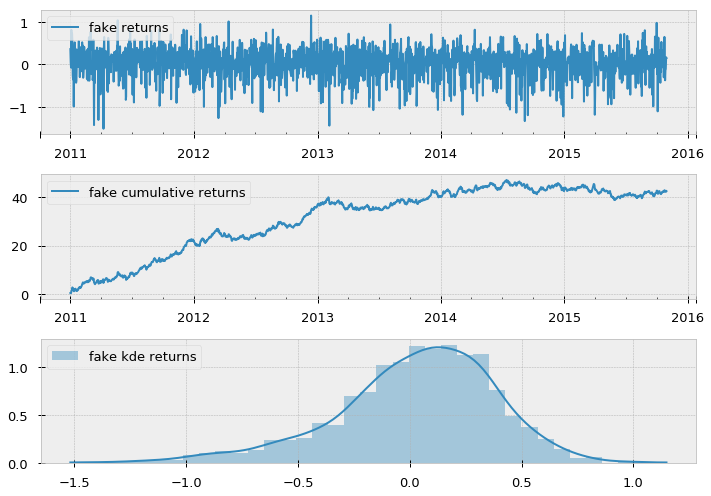

In [3]:
def mix_data(mus, sigmas, probs, n):

    np.random.seed(0)
    # randomly sample from binomial to select distr.
    z = np.random.binomial(1, true_probs[1], n)
    # sample from normal distr. and associated parameters according to z
    X = np.random.normal(true_mus[z], true_sigmas[z])
    
    # fake dates to make it look real
    fake_dates = pd.date_range('2011', periods=n)
    fake_returns = pd.Series(X, index=fake_dates)
    
    return fake_returns

mixed = mix_data(true_mus, true_sigmas, true_probs, n=n)

fig, axs = plt.subplots(nrows=3, figsize=(10,7))#, sharex=True)

mixed.plot(ax=axs[0], label='fake returns')
mixed.cumsum().plot(ax=axs[1], label='fake cumulative returns')
sns.distplot(mixed, ax=axs[2], kde_kws=dict(cut=0), label='fake kde returns')
for ax in axs: 
    ax.legend(loc='upper left') 
    ax.tick_params('both', direction='inout', length=7, width=1, which='major')
plt.tight_layout()

#### Code Normal Distribution Class

After creating our somewhat realistic looking mixture we need to code our normal distribution class. 

It needs to be able to take mu, sigma parameters and contain methods to compute the log probability density function (logpdf, or log_density) of the data given the parameters. It also needs to be able to estimate the parameters of the normal distribution given the data and weights.

In [4]:
# code adapted from: https://github.com/sseemayer/mixem

class Normal:
    """Univariate normal distribution with parameters (mu, sigma)."""

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def log_density(self, data):
        """fn: compute log pdf of normal distr. given parameters and data"""
        
        assert(len(data.shape) == 1), "Expect 1D data!"
        
        # uncomment to confirm they produce same values
        log_pdf = stats.norm.logpdf(data, loc=self.mu, scale=self.sigma)
        #log_pdf = - (data - self.mu) ** 2 / (2 * self.sigma ** 2) - np.log(self.sigma) - 0.5 * np.log(2 * np.pi)
        return log_pdf

    def estimate_parameters(self, data, weights):
        """fn: estimate parameters of normal distr. given data and weights"""
        
        assert(len(data.shape) == 1), "Expect 1D data!"

        wsum = np.sum(weights)

        self.mu = np.sum(weights * data) / wsum
        self.sigma = np.sqrt(np.sum(weights * (data - self.mu) ** 2) / wsum)    

#### Initialize Expectation-Maximization Algorithm

Now we can make incorrect guesses about the parameters of the two distributions as initial starting points to the EM algorithm. 

In [5]:
# terrible guesses at the true prior probability
init_stable_prob = 0.5
init_volatile_prob = 0.5

# guesses at starting mean
init_stable_mean = 0.10
init_volatile_mean = -0.1

# guesses at starting std
init_stable_std = 0.10
init_volatile_std = 0.3

init_probs = np.array([init_stable_prob, init_volatile_prob])
init_means = np.array([init_stable_mean, init_volatile_mean])
init_sigmas = np.array([init_stable_std, init_volatile_std])

Now we are ready to code the actual algorithm steps. Code is adapted from [here](https://github.com/sseemayer/mixem/blob/master/mixem/em.py)

In [6]:
# wrap our distributions in a list
distributions = [Normal(init_means[0], init_sigmas[0]), 
                 Normal(init_means[1], init_sigmas[1])]
# set data
data = mixed.copy()    

# set algorithm parameters
max_iterations = tol_iters = 1000
tol=1e-5

# get key dim info
n_distr = true_mus.shape[0]
n_data = data.shape[0]

weight = np.array(init_probs) # init weight array
last_ll = np.full((tol_iters, ), np.nan) # init log-likelihood array
resp = np.empty((n_data, n_distr)) # init algo weights/resp array
log_density = np.empty((n_data, n_distr)) # init logpdf array

iteration = 0 # init counter

#### Run Expectation-Maximization Algorithm

In [7]:
while True:
    # ---------------------------------------------------------
    # E-step 
    # ---------------------------------------------------------
    
    # compute responsibilities aka weights
    for d in range(n_distr):
        log_density[:, d] = distributions[d].log_density(data)
        
    # normalize responsibilities of distributions so they sum up to one for example
    resp = weight[np.newaxis, :] * np.exp(log_density)
    resp /= np.sum(resp, axis=1)[:, np.newaxis]
    
    # compute log-likelihood
    log_likelihood = np.sum(resp @ log_density.T) # matrix multiplication
    
    # ---------------------------------------------------------
    # M-step 
    # ---------------------------------------------------------
    
    # now that we have the new weights we update the parameters
    # of the distributions
    for d in range(n_distr):
        distributions[d].estimate_parameters(data, resp[:, d])

    weight = np.mean(resp, axis=0)
    
    # ---------------------------------------------------------
    # check convergence
    # ---------------------------------------------------------
    
    if np.isnan(log_likelihood):
        last_ll[0] = log_likelihood
        print('loglk is nan')
        break
    
    if  ((last_ll[0] - log_likelihood) / last_ll[0]) <= tol:
        last_ll[0] = log_likelihood
        print('change in loglk less than tolerance')
        break

    if iteration >= max_iterations:
        last_ll[0] = log_likelihood
        print('reached maximum iterations')
        break

    # ---------------------------------------------------------
    # store value of current iteration in last_ll[0]
    #   and shift older values to the right
    # ---------------------------------------------------------    
    last_ll[1:] = last_ll[:-1]
    last_ll[0] = log_likelihood
    
    # ---------------------------------------------------------
    # info display
    # ---------------------------------------------------------    
    mus = np.array([distributions[i].mu for i in range(n_distr)])
    sigs = np.array([distributions[i].sigma for i in range(n_distr)])
    
    regime_map = {0:'stable', 1:'risky'}
    iter_data = (pd.DataFrame(np.vstack([mus, sigs, weight,
                                         true_mus, true_sigmas, true_probs]),
                              columns=[f'{regime_map[i]} regime' for i in range(n_distr)],
                              index=['means', 'sigmas', 'weights',
                                     'true_means', 'true_sigmas', 'true_weights'])
                 .round(3))
    
    if iteration % 50==0:
        print()
        print('-'*77)
        print(f'iteration: {iteration}')
        print(f"ll new: {last_ll[0].round(3)}")
        display(iter_data.T)
    iteration += 1      


-----------------------------------------------------------------------------
iteration: 0
ll new: -7322372.071


,means,sigmas,weights,true_means,true_sigmas,true_weights
stable regime,0.1250,0.1280,0.3600,0.1500,0.2500,0.6500
risky regime,-0.0330,0.4360,0.6400,-0.1700,0.4500,0.3500



-----------------------------------------------------------------------------
iteration: 50
ll new: -2192438.086


,means,sigmas,weights,true_means,true_sigmas,true_weights
stable regime,0.1490,0.2330,0.5770,0.1500,0.2500,0.6500
risky regime,-0.1460,0.4380,0.4230,-0.1700,0.4500,0.3500



-----------------------------------------------------------------------------
iteration: 100
ll new: -2093505.191


,means,sigmas,weights,true_means,true_sigmas,true_weights
stable regime,0.1400,0.2460,0.6530,0.1500,0.2500,0.6500
risky regime,-0.1930,0.4450,0.3470,-0.1700,0.4500,0.3500



-----------------------------------------------------------------------------
iteration: 150
ll new: -2070105.946


,means,sigmas,weights,true_means,true_sigmas,true_weights
stable regime,0.1380,0.2500,0.6730,0.1500,0.2500,0.6500
risky regime,-0.2090,0.4460,0.3270,-0.1700,0.4500,0.3500



-----------------------------------------------------------------------------
iteration: 200
ll new: -2063535.044


,means,sigmas,weights,true_means,true_sigmas,true_weights
stable regime,0.1370,0.2510,0.6790,0.1500,0.2500,0.6500
risky regime,-0.2140,0.4460,0.3210,-0.1700,0.4500,0.3500



-----------------------------------------------------------------------------
iteration: 250
ll new: -2061503.148


,means,sigmas,weights,true_means,true_sigmas,true_weights
stable regime,0.1370,0.2510,0.6810,0.1500,0.2500,0.6500
risky regime,-0.2160,0.4460,0.3190,-0.1700,0.4500,0.3500


change in loglk less than tolerance


Text(0.5,1,'Minimizing Negative Log Likelihood')

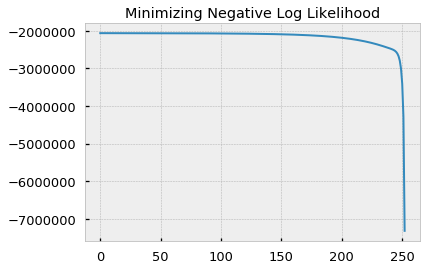

In [8]:
pd.Series(last_ll).dropna().plot()
plt.title('Minimizing Negative Log Likelihood')

Not bad right? This algorithm is pretty flexible although you can adjust the true parameters and/or the guesses and you will find some of the limitations. However how those are addressed are beyond the scope of this chapter.

My goal was to provide a simple working example of the algorithm, in order for us to gain a deeper understanding of what is happening inside the black box of the algorithm. 

Now we can move forward.

## Fitting Mixture Models Using Real Data

In [9]:
infp = PurePath(data_dir/'etf_returns_2004-11-19-2017-12-31.parq')
R = (pd.read_parquet(infp)
     .assign(year=lambda df: df.index.year)) # add year column for later conv.
cprint(R)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
               SPY     QQQ     TLT    GLD     EFA     EEM  year
Date                                                           
2017-12-25  0.0000  0.0000  0.0000 0.0000  0.0000  0.0000  2017
2017-12-26 -0.0012 -0.0054  0.0030 0.0068 -0.0003 -0.0009  2017
2017-12-27  0.0005  0.0001  0.0129 0.0038  0.0019  0.0026  2017
2017-12-28  0.0021  0.0012 -0.0009 0.0051  0.0006  0.0068  2017
2017-12-29 -0.0038 -0.0062  0.0016 0.0065  0.0007  0.0047  2017
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3421 entries, 2004-11-19 to 2017-12-29
Data columns (total 7 columns):
SPY     3421 non-null float64
QQQ     3421 non-null float64
TLT     3421 non-null float64
GLD     3421 non-null float64
EFA     3421 non-null float64
EEM     3421 non-null float64
year    3421 no

In [10]:
sym = 'SPY' # example symbol
df = R.loc['2005':].copy() # use 2005 cutoff b/c it's first full year of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3390 entries, 2005-01-03 to 2017-12-29
Data columns (total 7 columns):
SPY     3390 non-null float64
QQQ     3390 non-null float64
TLT     3390 non-null float64
GLD     3390 non-null float64
EFA     3390 non-null float64
EEM     3390 non-null float64
year    3390 non-null int64
dtypes: float64(6), int64(1)
memory usage: 211.9 KB


In [11]:
df2 = (df[[sym]]
       .assign(normal=lambda df:
               stats.norm.rvs(df[sym].mean(), df[sym].std(),
                                              size=len(df[sym])))
       .assign(laplace=lambda df: 
               stats.laplace.rvs(df[sym].mean(), df[sym].std(),
                                              size=len(df[sym]))))

df2.head()

,SPY,normal,laplace
Date,,,
2005-01-03,-0.0047,0.0067,0.0329
2005-01-04,-0.0123,-0.0092,-0.0065
2005-01-05,-0.0069,0.0029,0.0051
2005-01-06,0.0051,-0.0036,0.0138
2005-01-07,-0.0014,-0.0125,0.0248


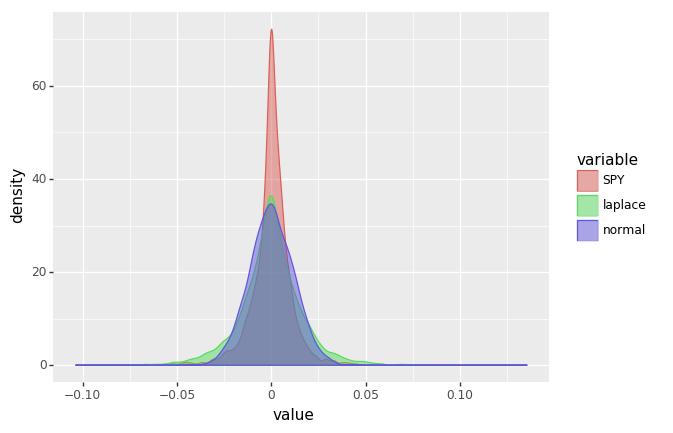

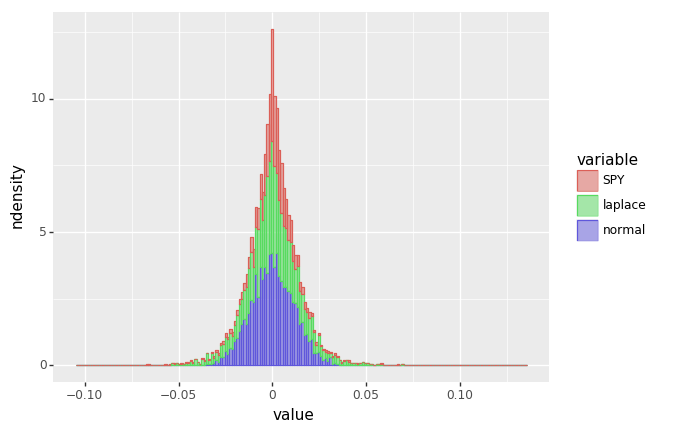

In [12]:
p = (pn.ggplot(pd.melt(df2), pn.aes(x='value', color='variable'))
     +pn.geom_density(pn.aes(fill='variable'), alpha=0.5))
p.draw();

p = (pn.ggplot(pd.melt(df2), pn.aes(x='value', color='variable'))
     +pn.geom_histogram(pn.aes(y='..ndensity..', fill='variable'), alpha=0.5))
p.draw();

Continuing with our example, using SPY returns, let's use sklearn to fit a GMM model. First we will fit one using a single component. This is equivalent to fitting a single normal distribution to the set of returns.

In [13]:
def make_gmm(n_components, max_iter=150, random_state=RANDOM_STATE):
    """fn: create gmm object"""
    model_kwds = dict(n_components=n_components, 
                      max_iter=max_iter,
                      n_init=100,
                      random_state=RANDOM_STATE)

    gmm = mix.GaussianMixture(**model_kwds)
    return gmm

def print_gmm_results(gmm, X):
    print('-'*25)
    print(f'means: {gmm.means_.ravel()}')
    print('-'*25)
    print(f'covars: {gmm.covariances_.ravel()}')
    print('-'*25)
    print(f'sqrt covar: {np.sqrt(gmm.covariances_.ravel())}')
    print('-'*25)
    print(f'aic: {gmm.aic(X):.5f}')
    print(f'bic: {gmm.bic(X):.5f}')
    print('-'*25)
    
#######
s = df[sym]
max_iter = 150 
_X = s.values.reshape(-1, 1)

gmm1 = make_gmm(1, max_iter)
gmm1.fit(_X)

preds = gmm1.predict(_X)

print_gmm_results(gmm1,_X)
print(f'data derived mean: {s.mean():.7f}')
print(f'data derived std: {s.std():.7f}')

-------------------------
means: [0.00023363]
-------------------------
covars: [0.00013651]
-------------------------
sqrt covar: [0.01168375]
-------------------------
aic: -20568.42188
bic: -20556.16471
-------------------------
data derived mean: 0.0002336
data derived std: 0.0116426


### Comparing AIC and BIC of Different numbers of Component Mixtures

Note that the mean and standard deviation is the same as computed in the previous plot. Also note the `aic` and `bic` metrics. These reference the [`Akaike Information Criterion`](https://en.wikipedia.org/wiki/Akaike_information_criterion) and the [`Bayesian Information Criterion`](https://en.wikipedia.org/wiki/Bayesian_information_criterion). Without delving too heavily into the theoretical pros and cons of each, we can just say they are both methods which allow us to compare the relative suitability of different models. Generally speaking, when choosing among a set of models we want to choose the `aic` or `bic` with the smallest information criterion value.

> AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. The penalty discourages overfitting, because increasing the number of parameters in the model almost always improves the goodness of the fit. - [wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion)

The importance of the penalty component in each of the ICs cannot be overstated. As always, in the limit, you could technically fit a distribution, or add a parameter for _every_ datapoint, thereby grossly overfitting the model. 

Both metrics implement a penalty, however the `bic` penalizes additional parameters more heavily than the `aic` and will always result in a selecting fewer parameters than the `aic` would. Let's walkthrough a quick demo of this.

In [14]:
gmm2 = make_gmm(2, max_iter)
gmm2.fit(_X)

print_gmm_results(gmm2,_X)

-------------------------
means: [-0.00266647  0.00078149]
-------------------------
covars: [6.15239699e-04 4.41844483e-05]
-------------------------
sqrt covar: [0.02480403 0.00664714]
-------------------------
aic: -21866.06618
bic: -21835.42325
-------------------------


Above we fit a GMM model with `2` components. Notice that both the `aic` and `bic` are smaller than their single component counterparts. This implies that the model with `2` components is "better" than the one with a single component. What about more components? Let's try `15`. 

In [15]:
gmm15 = make_gmm(15, max_iter)
gmm15.fit(_X)

print_gmm_results(gmm15,_X)

-------------------------
means: [ 0.01388283  0.00023159 -0.02183881  0.03311002 -0.00824004  0.00862988
 -0.03084074  0.12304543 -0.07724461  0.00415294 -0.00324585 -0.01365624
  0.02042235  0.060776   -0.04614129]
-------------------------
covars: [7.99686450e-06 4.39321022e-06 1.23421269e-05 3.91651572e-05
 6.51551472e-06 6.34283435e-06 1.69453159e-05 1.58093460e-04
 2.21893063e-04 5.60964597e-06 5.89996895e-06 7.85232708e-06
 1.14285799e-05 3.71869515e-05 2.97916425e-05]
-------------------------
sqrt covar: [0.00282787 0.002096   0.00351314 0.00625821 0.00255255 0.0025185
 0.00411647 0.01257352 0.01489608 0.00236847 0.00242899 0.0028022
 0.00338062 0.00609811 0.00545817]
-------------------------
aic: -22051.87240
bic: -21782.21465
-------------------------


Now we see an example where the `aic` has improved by getting smaller but the `bic` is actually larger than the `2` component model. Here we see the result of the `bic` penalizing additional parameters more heavily. 

### Choosing The Optimal Number of Components using AIC/BIC

Below we can see a comparison between the two metrics as we increase the number of components. We can also see that they choose different numbers of optimal components.

In [16]:
def make_ic_series(list_of_tups, name=None):
    """fn: convert list of tuples for 
            information criterion (aic, bic) into series
    # args
        list_of_tups : list() of tuples()
            tuple[0] is n_component, tuple[1] is IC
        name : str(), name of IC
    
    # returns
        s : pd.Series()
            index is n_components, values are IC's
    """
    s = (pd.DataFrame(list_of_tups)
          .rename(columns={0:'n_components', 1:name})
          .set_index('n_components')
          .squeeze())
    return s

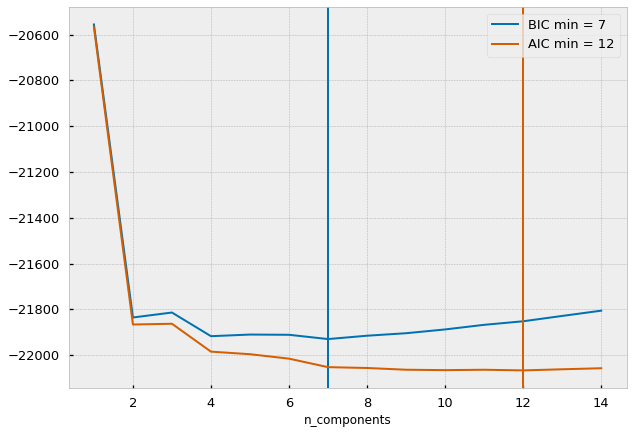

In [17]:
n_components = np.arange(1,15)
aics = []
bics = []

for n in n_components:
    tmp_gmm = make_gmm(n, max_iter).fit(_X)
    aics.append((n, tmp_gmm.aic(_X)))
    bics.append((n, tmp_gmm.bic(_X)))

bics = make_ic_series(bics, 'bic')
aics = make_ic_series(aics, 'aic')
    
plt.figure(figsize=(10,7))  
plt.plot(n_components, bics.values, color=blue, label=f'BIC min = {np.argmin(bics)}')
plt.axvline(np.argmin(bics), color=blue)

plt.plot(n_components, aics.values, color=red, label=f'AIC min = {np.argmin(aics)}')
plt.axvline(np.argmin(aics), color=red)

plt.legend(loc='best')
plt.xlabel('n_components');

As shown above the `aic` selects `12` components as being the best model whereas the `bic` selects only `7`. For convenience we will use the `bic` recommendation for the remainder of the this notebook. One exercise I leave for the reader is to run the `aic`, `bic`, component analysis using different asset returns, and using different lookback periods. 

## Visualizing Regimes

Below is a demonstration of the how varied the components are across multiple lookback periods. Note that we choose only `2` components even though the `BIC` informed us that `7` was the "optimal" number. This is done for interpretability purposes. In this example one regime will be considered `stable` and the other as `risky`. Due to the unsupervised nature of the algorithm we cannot know which regime is which apriori. So for the rest of the example the regimes will be named `s1, s2` as in state 1, and state 2. 

Note what we make use of the `TimeSeriesSplit` tool from `sklearn` to implement our walkforward testing. 

CPU times: user 21.8 s, sys: 7.1 s, total: 28.9 s
Wall time: 18.8 s


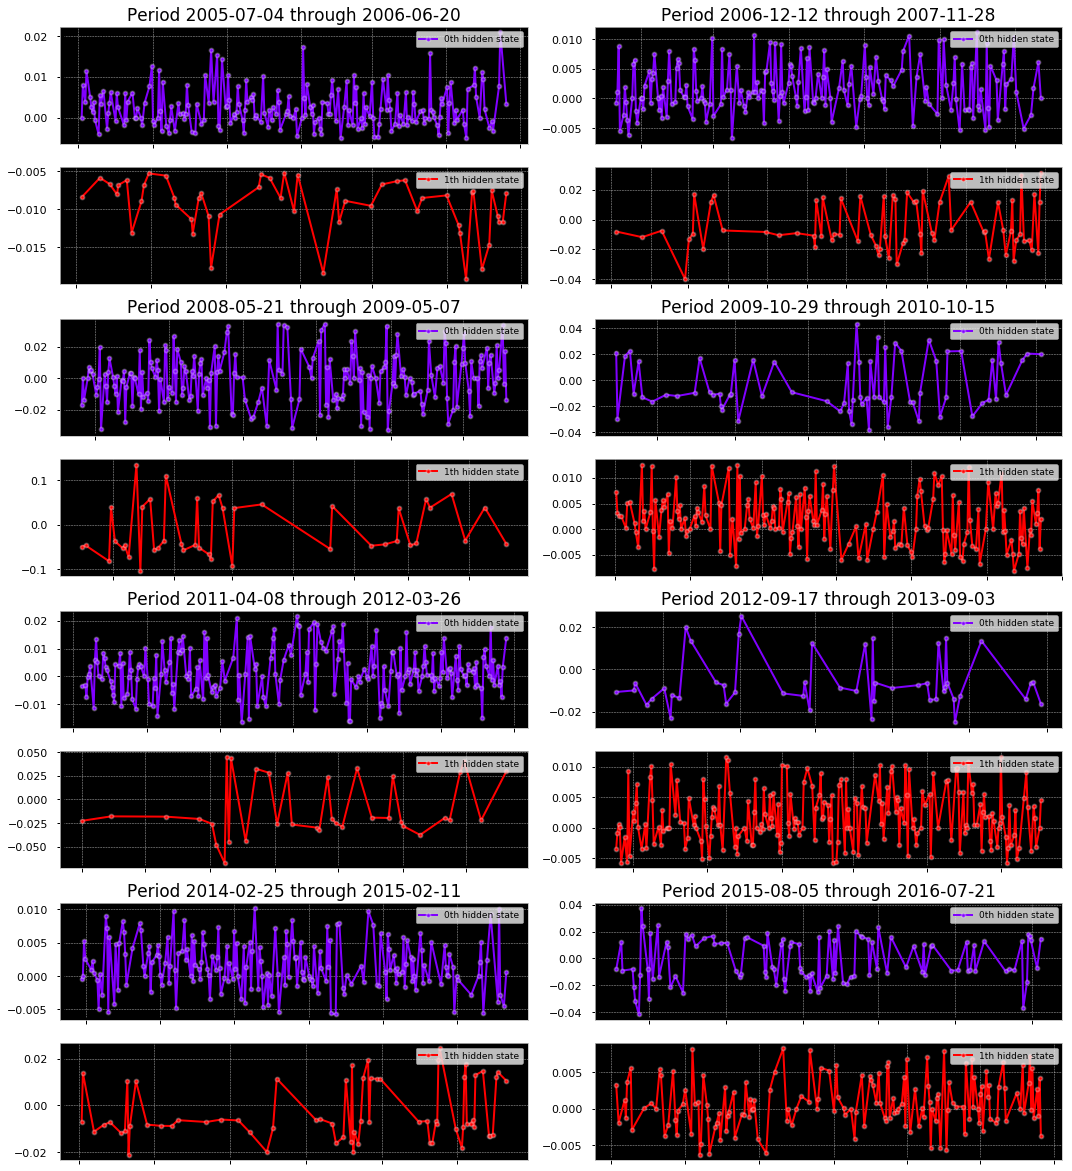

In [18]:
%%time
np.random.seed(0)

lookback = 252 #* 3 # 3 trading years
n_components = 2
max_iter = 1000
n_split = n_components * 4
grid_rows = math.ceil(n_split/2)

# stash data in lists
preds = []
pred_means = []
pred_covs = []

### begin plot code ###
fig = plt.figure(figsize=(15,20))
outer_grid = gridspec.GridSpec(grid_rows, 2)
colors = plt.cm.rainbow(np.linspace(0, 1, n_components))

tscv = TimeSeriesSplit(n_splits=n_split, max_train_size=lookback)

for i, (train, test) in enumerate(tscv.split(s)):
    tmp_train = s.iloc[train] # temporary train data
    tmp_test = s.iloc[test] # temporary test data
    
    _X = tmp_train.values.reshape(-1,1) # format pd.Series for sklearn
    gmm = make_gmm(n_components, max_iter) # make model
    gmm.fit(_X) # fit model
    
    # predict hidden states
    hidden_states = gmm.predict(_X)
    
    # store output in lists
    preds.append(hidden_states)
    pred_means.append(gmm.means_)
    pred_covs.append(gmm.covariances_)
    
    # make inner grid for subplots
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_components, 1,
                                                  subplot_spec=outer_grid[i],
                                                  wspace=0.0, hspace=0.2)
    title_text = f"Period {tmp_train.index.min().strftime('%Y-%m-%d')} through {tmp_train.index.max().strftime('%Y-%m-%d')}"
    for j, (_, color) in enumerate(zip(range(grid_rows), colors)):
       
        hs = pd.Series(hidden_states.copy())
        mask = hs[hs==j] # index locs of each hidden state
        
        tmp_ax = plt.Subplot(fig, inner_grid[j,:]) # make inner grid ax
        marker_edge_color = mpl.colors.colorConverter.to_rgba('white', alpha=.3)
        tmp_train[mask.index].plot(ax=tmp_ax, c=color,
                                   marker='o', markersize=4,
                                   markeredgecolor=marker_edge_color,
                                   markeredgewidth=1.75, label=f"{j}th hidden state")
        tmp_ax.set_facecolor('k')#sns.xkcd_rgb['slate'])
        tmp_ax.legend(loc='upper right', fontsize=9)

        tmp_ax.tick_params(axis='x', which='both', labelsize=11, rotation=30)
        tmp_ax.tick_params(axis='y', which='both', labelsize=11)
        tmp_ax.tick_params(axis='both', direction='inout', length=7, width=1, which='major')
        
        if j==0: tmp_ax.set_title(title_text, fontsize=17, fontweight='medium')
        if j < (grid_rows-1): 
            tmp_ax.set_xticklabels([])
            tmp_ax.set_xlabel('')          
        fig.add_subplot(tmp_ax) # add inner grid ax to figure
        plt.tight_layout()
    
outfp=PurePath(pdir/'visuals'/'02_Gaussian_Mixtures'/'grid-test-2.png').as_posix()
plt.savefig(outfp,**savefig_kwds) 

We can see how varied the components are across different time periods. Some components are more active while others are rarely active. Additionally notice how some components are clustered over shorter sub periods while others are more evenly distributed.

Next we visualize these relationships further. For each time period, we plot the cumulative returns, color and shape coded to represent the different components. Then we show a boxplot of the aggregate returns over the period. Finally we print out the statistical description of the dataframe using `pandas.describe()`.  

In [19]:
def plot_cuml_state(states, state_col=None):
    g = (pn.ggplot(states, pn.aes(x='Date',y='mkt_cret', color=f'factor({state_col})')) 
         + pn.geom_point(pn.aes(shape=f'factor({state_col})'))
         + pn.geom_hline(yintercept=0., size=1, linetype=':', color='red')
         + pn.scale_y_continuous(breaks=mzb.mpl_breaks(),
                                 labels=mzf.percent_format(),
                                 limits=(states['mkt_cret'].min(), states['mkt_cret'].max()))
         + pn.theme_linedraw()
         + pn.theme(panel_background=pn.element_rect(fill='black'), 
                    axis_text_x=pn.element_text(rotation=50),
                    text=pn.element_text(size=7)) 
         + pn.ylab('log returns')
         + pn.ggtitle('Cumulative Log Returns by Hidden State'))
    return g

def plot_facet_cuml_states(states, state_col=None):
    g = (pn.ggplot(states, pn.aes(x='Date',y='mkt_cret', color=f'factor({state_col})')) 
         + pn.geom_point(pn.aes(shape=f'factor({state_col})'))
         + pn.geom_hline(yintercept=0., size=1, linetype=':', color='red')         
         + pn.facet_wrap(f'~{state_col}')
         + pn.scale_y_continuous(breaks=mzb.mpl_breaks(),
                                 labels=mzf.percent_format(),
                                 limits=(states['mkt_cret'].min(), states['mkt_cret'].max()))
         + pn.theme_linedraw()
         + pn.theme(panel_background=pn.element_rect(fill='black'), 
                    axis_text_x=pn.element_text(rotation=50),
                    text=pn.element_text(size=7)) 
         + pn.ylab('log returns')
         + pn.ggtitle('Cumulative Log Returns by Hidden State'))
    return g

def plot_states_boxplot(states, state_col, y_col):
    g = (pn.ggplot(states, pn.aes(x=state_col, y=y_col, color=f'factor({state_col})')) 
         + pn.geom_boxplot()
         + pn.geom_jitter(alpha=0.5)
         + pn.geom_hline(yintercept=0., size=1, linetype=':', color='red')         
         + pn.scale_y_continuous(breaks=mzb.mpl_breaks(),
                                 labels=mzf.percent_format(),
                                 limits=(states[y_col].min(), states[y_col].max()))
         + pn.theme_linedraw()
         + pn.theme(panel_background=pn.element_rect(fill='black'), 
                    axis_text_x=pn.element_text(rotation=30),) 
         + pn.ylab('log returns')
         + pn.ggtitle('Log Returns by Hidden State'))
    return g

With the plotting functions defined we can loop through the `TimeseriesSplit` object to generate the plots and descriptive tables for each lookback/training period. 


*****************************************************************************


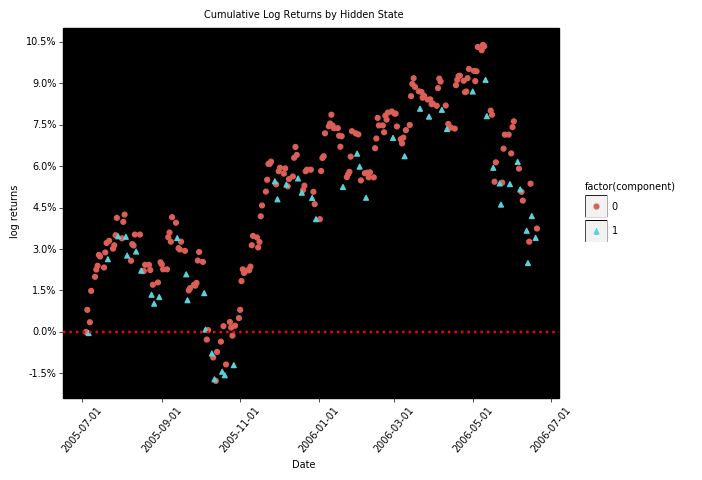

<ggplot: (8733357257911)>


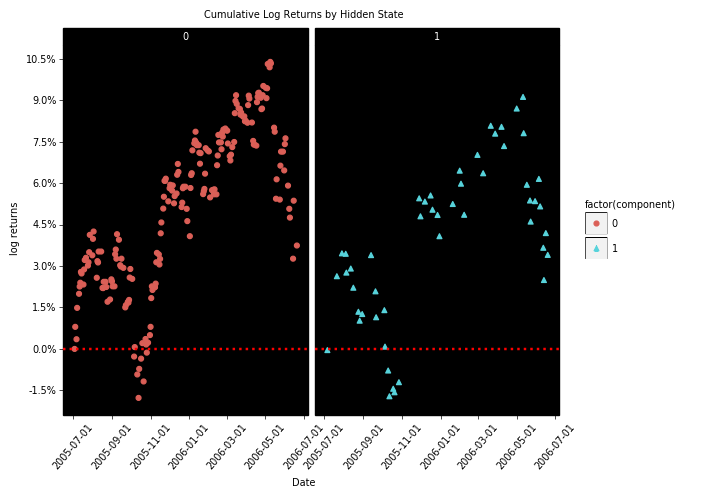

<ggplot: (-9223363303497344084)>


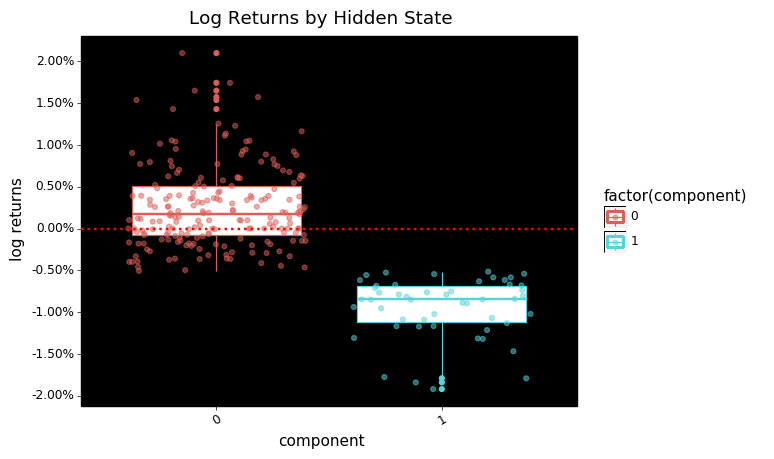

<ggplot: (8733283492307)>


component,0,1
count,202.0000,50.0000
mean,0.0025,-0.0094
std,0.0047,0.0036
min,-0.0051,-0.0192
25%,-0.0008,-0.0112
50%,0.0018,-0.0085
75%,0.0051,-0.0068
max,0.0210,-0.0052



*****************************************************************************


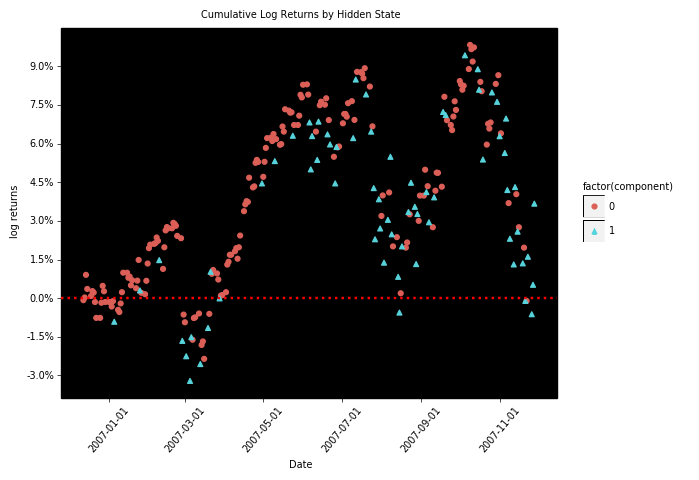

<ggplot: (-9223363303571394311)>


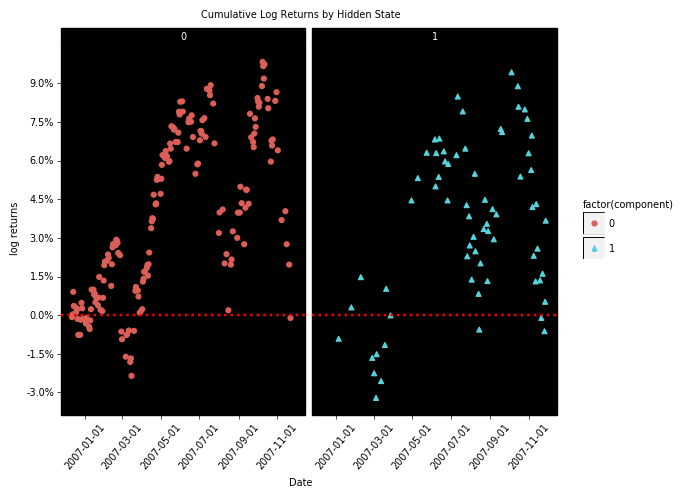

<ggplot: (8733283352517)>


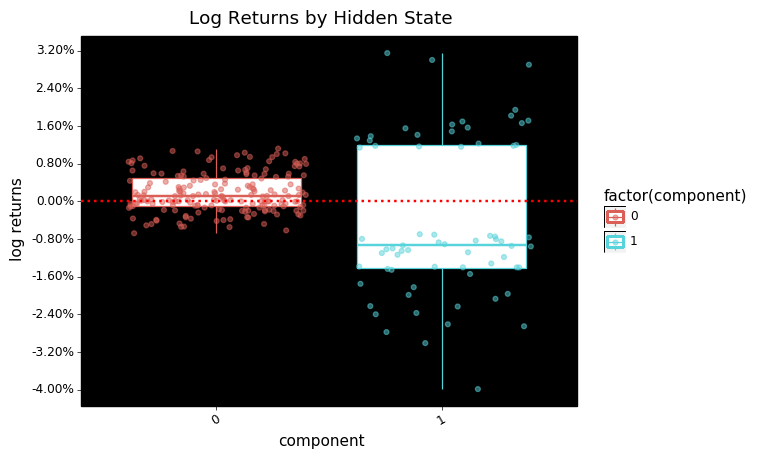

<ggplot: (8733283360737)>


component,0,1
count,184.0000,68.0000
mean,0.0018,-0.0042
std,0.0041,0.0164
min,-0.0068,-0.0398
25%,-0.0009,-0.0141
50%,0.0011,-0.0092
75%,0.0049,0.0121
max,0.0112,0.0315



*****************************************************************************


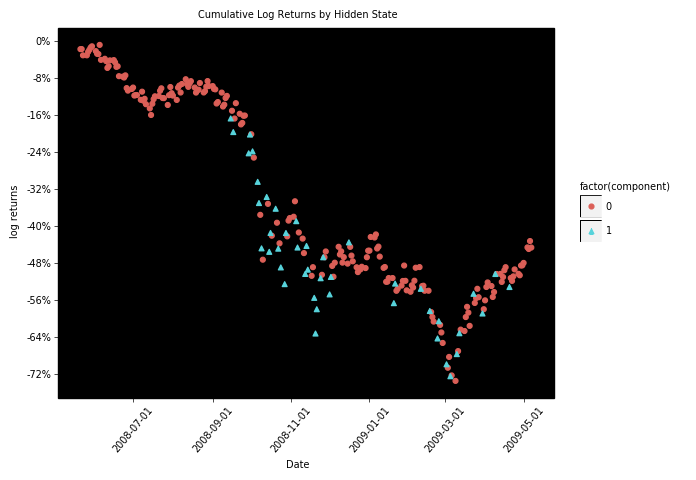

<ggplot: (-9223363303571395433)>


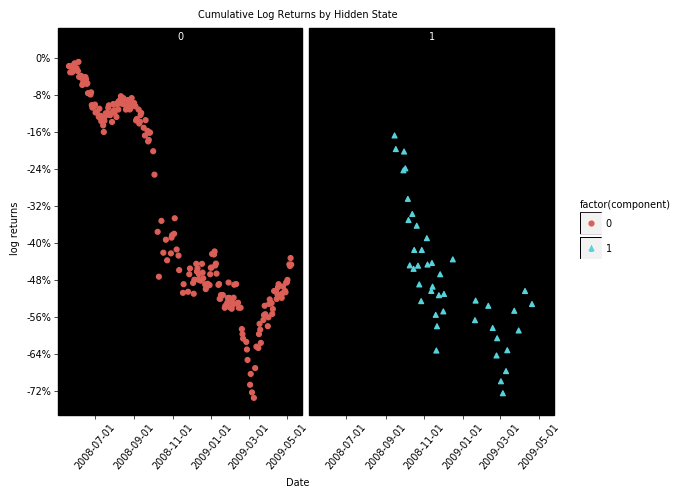

<ggplot: (8733283171683)>


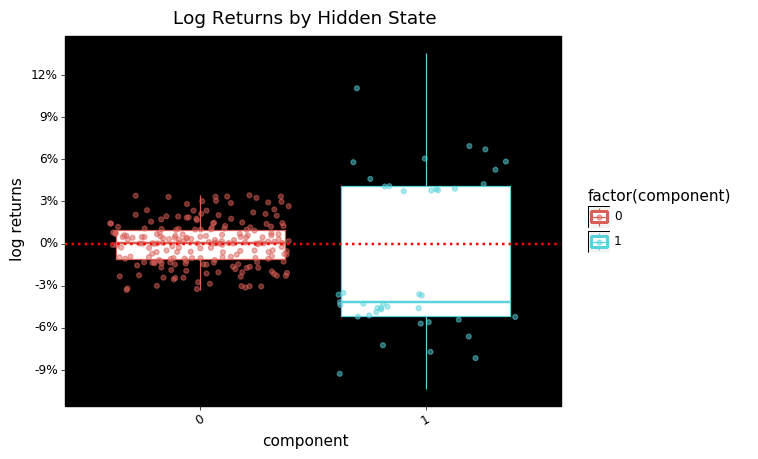

<ggplot: (8733283181695)>


component,0,1
count,209.0000,43.0000
mean,-0.0000,-0.0102
std,0.0157,0.0593
min,-0.0330,-0.1036
25%,-0.0110,-0.0516
50%,0.0004,-0.0417
75%,0.0099,0.0407
max,0.0343,0.1356



*****************************************************************************


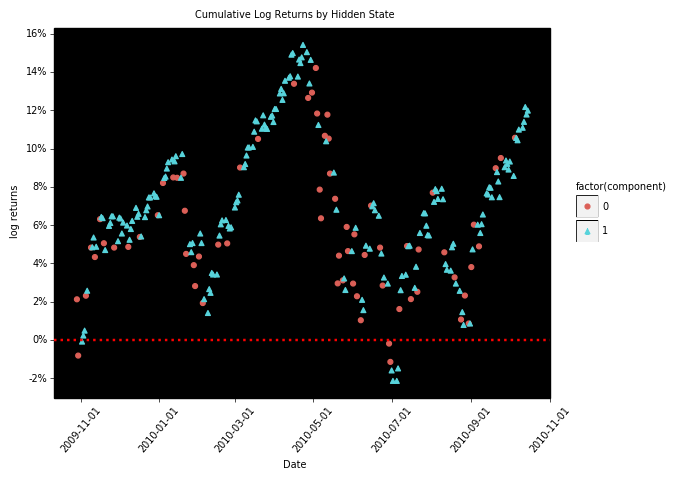

<ggplot: (8733283008232)>


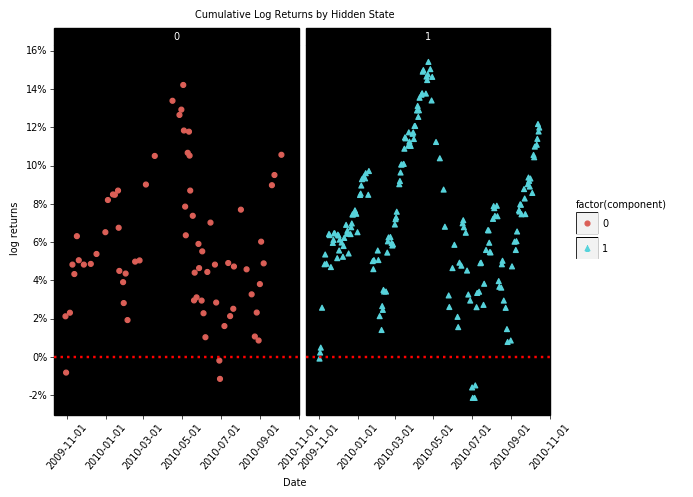

<ggplot: (-9223363303571754983)>


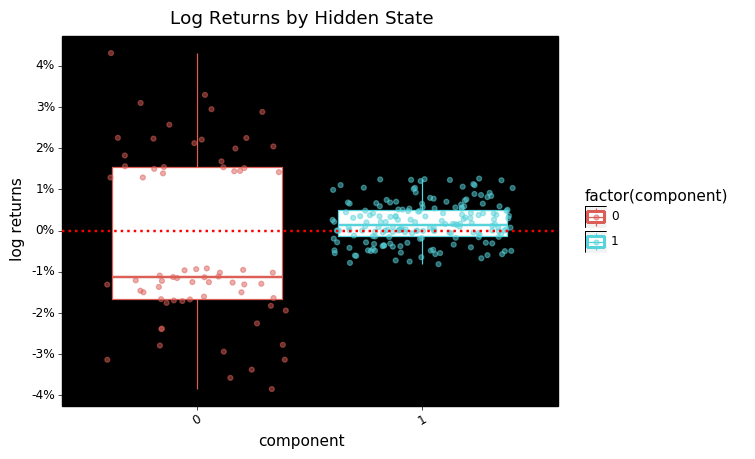

<ggplot: (8733282992048)>


component,0,1
count,69.0000,183.0000
mean,-0.0032,0.0018
std,0.0202,0.0049
min,-0.0385,-0.0082
25%,-0.0167,-0.0014
50%,-0.0113,0.0014
75%,0.0154,0.0051
max,0.0431,0.0126



*****************************************************************************


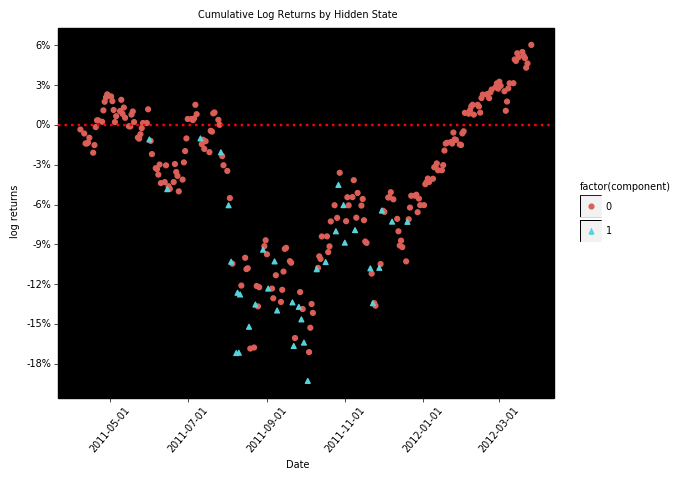

<ggplot: (8733282857799)>


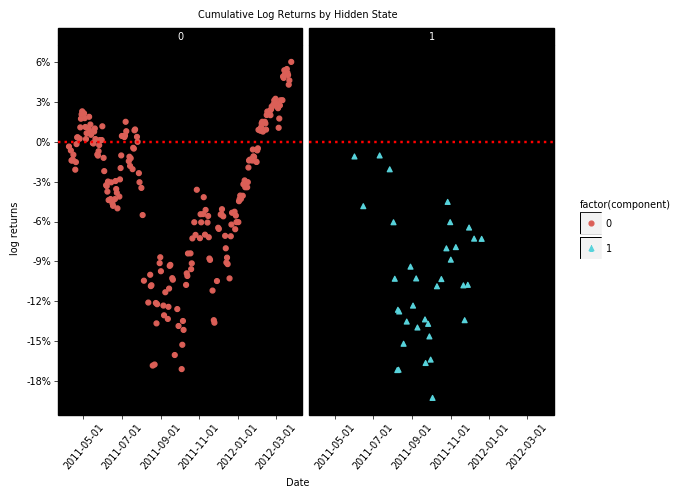

<ggplot: (-9223363303571812899)>


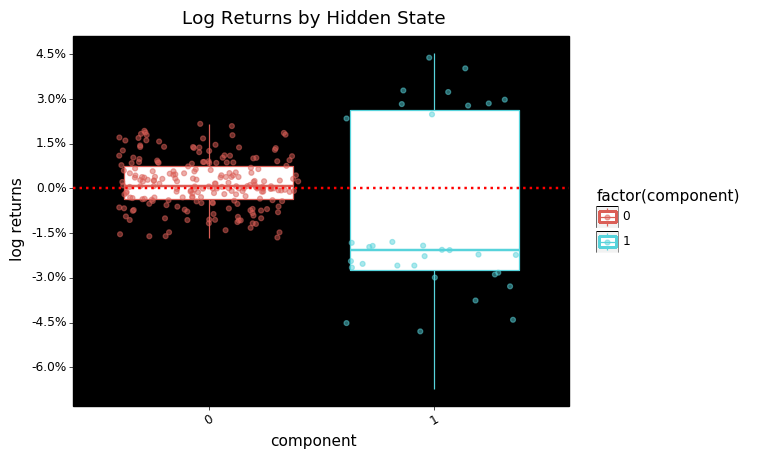

<ggplot: (-9223363303571672474)>


component,0,1
count,217.0000,35.0000
mean,0.0018,-0.0096
std,0.0082,0.0308
min,-0.0165,-0.0673
25%,-0.0034,-0.0274
50%,0.0008,-0.0207
75%,0.0074,0.0263
max,0.0217,0.0455



*****************************************************************************


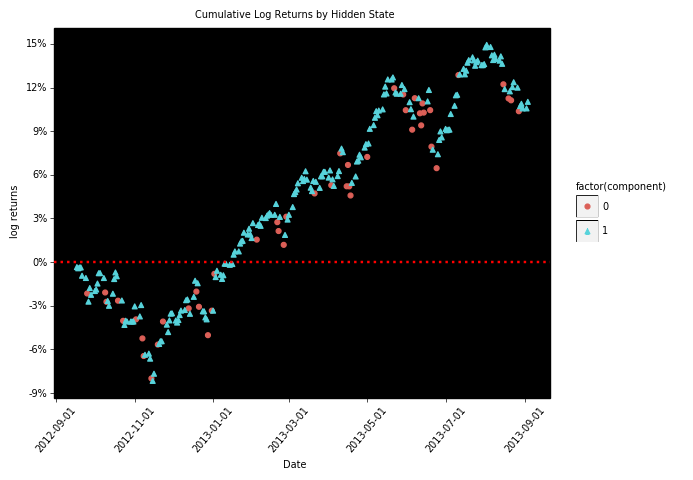

<ggplot: (-9223363303497478652)>


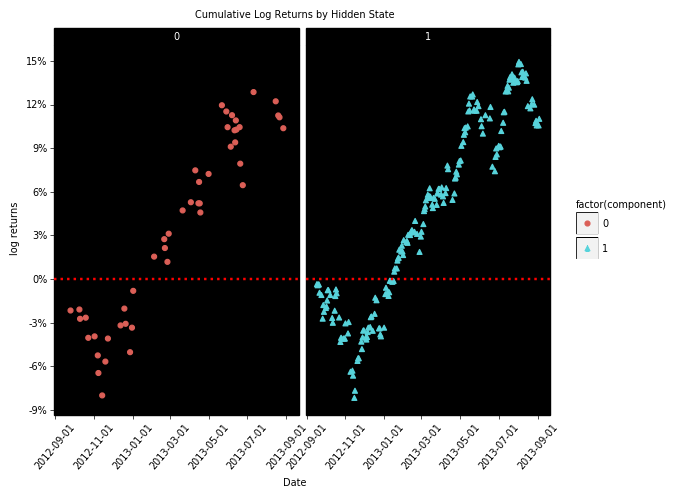

<ggplot: (-9223363303497427091)>


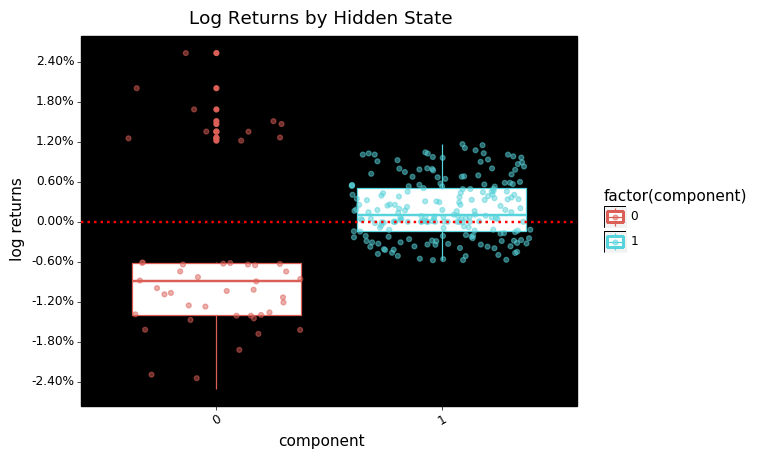

<ggplot: (8733357310640)>


component,0,1
count,47.0000,205.0000
mean,-0.0060,0.0019
std,0.0124,0.0044
min,-0.0251,-0.0058
25%,-0.0139,-0.0013
50%,-0.0089,0.0011
75%,-0.0062,0.0051
max,0.0253,0.0116



*****************************************************************************


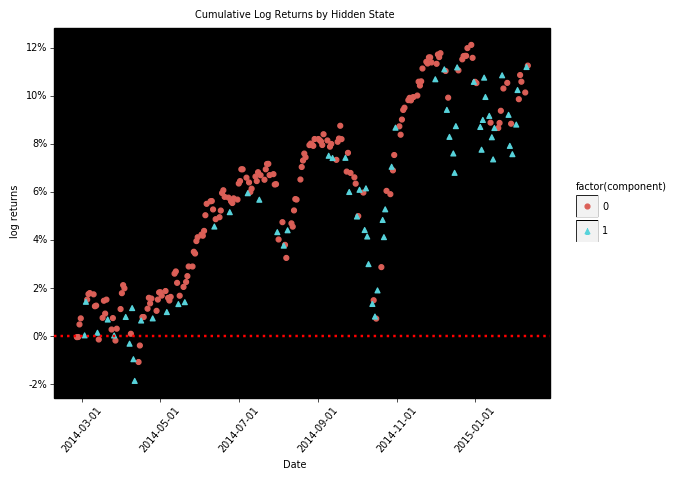

<ggplot: (-9223363303571953776)>


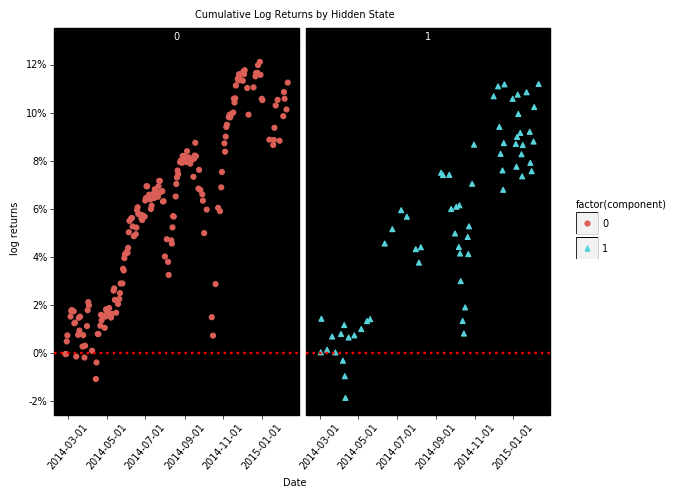

<ggplot: (-9223363303571980863)>


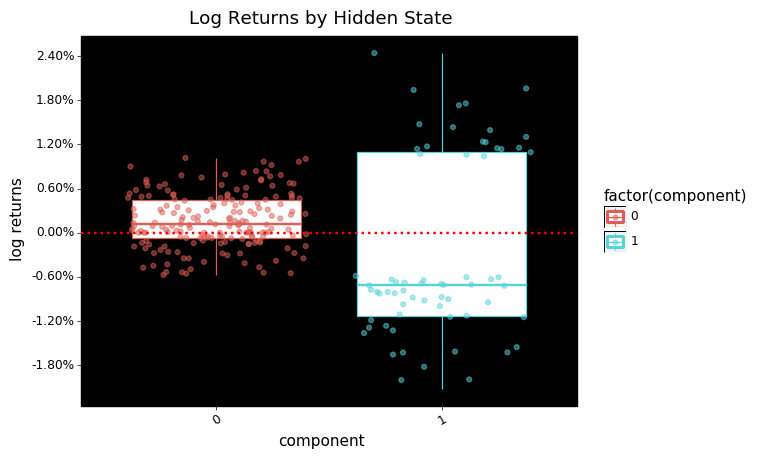

<ggplot: (-9223363303571972899)>


component,0,1
count,187.0000,65.0000
mean,0.0017,-0.0030
std,0.0037,0.0121
min,-0.0057,-0.0213
25%,-0.0007,-0.0113
50%,0.0011,-0.0071
75%,0.0045,0.0109
max,0.0102,0.0244



*****************************************************************************


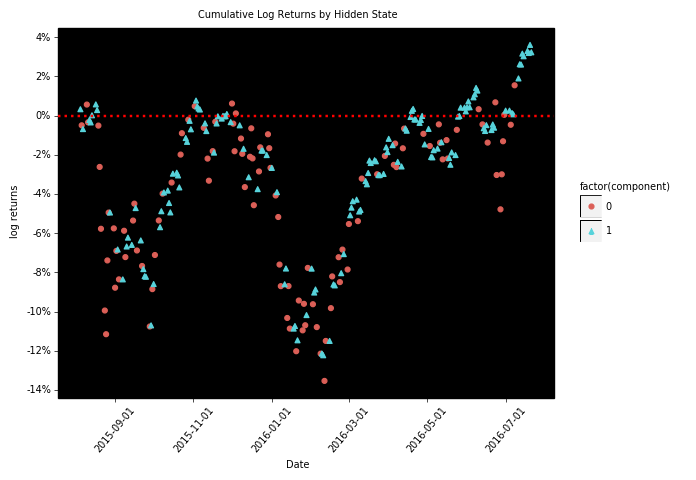

<ggplot: (-9223363303574087203)>


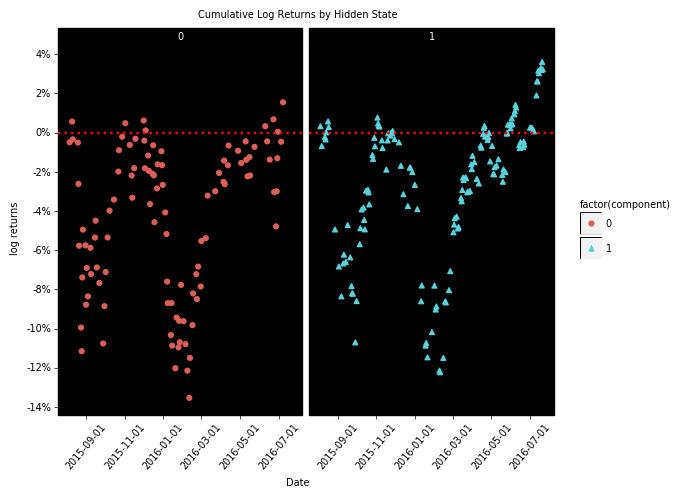

<ggplot: (8733280532330)>


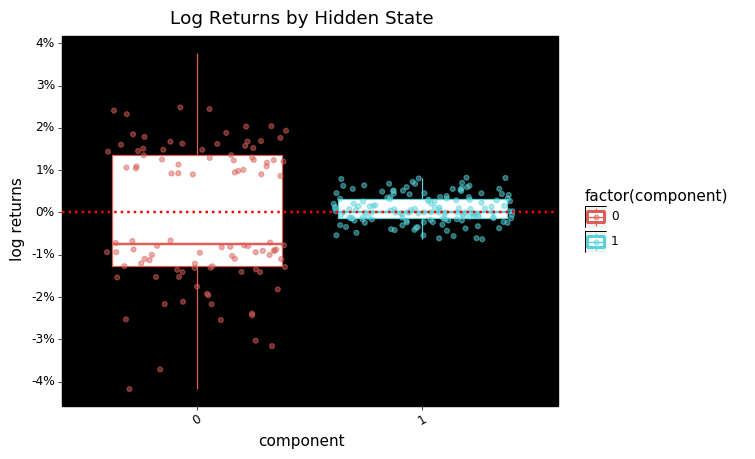

<ggplot: (8733280542598)>


component,0,1
count,104.0000,148.0000
mean,-0.0009,0.0008
std,0.0163,0.0034
min,-0.0417,-0.0063
25%,-0.0128,-0.0014
50%,-0.0075,0.0002
75%,0.0135,0.0033
max,0.0377,0.0082


In [20]:
### RUN` ###
for i, (train, test) in enumerate(tscv.split(s)):
    tmp_train = s.iloc[train].values.reshape(-1,1) # temporary train data
    tmp_test = s.iloc[test].values.reshape(-1,1) # temporary test data

    gmm = make_gmm(n_components, max_iter)
    gmm.fit(tmp_train)
    
    hidden_states_prob = gmm.predict_proba(tmp_train)
    hidden_states = gmm.predict(tmp_train)
    
    state_df = (s.iloc[train].to_frame()
                .assign(component=pd.Categorical(hidden_states))
                .assign(mkt_cret=lambda df: df[sym].cumsum())
                .reset_index())
    
    scol = 'component'
    g = plot_cuml_state(state_df, state_col=scol)
    g1 = plot_facet_cuml_states(state_df, state_col=scol)
    g2 = plot_states_boxplot(state_df, scol, sym)
    print()
    print('*'*77)
    print(g)
    print(g1)
    print(g2)
    display(state_df.groupby(scol)[sym].describe().T)

Finally we wrap up this concept by plotting the `kde` of the returns with the component probability densities plotted inside as well. 

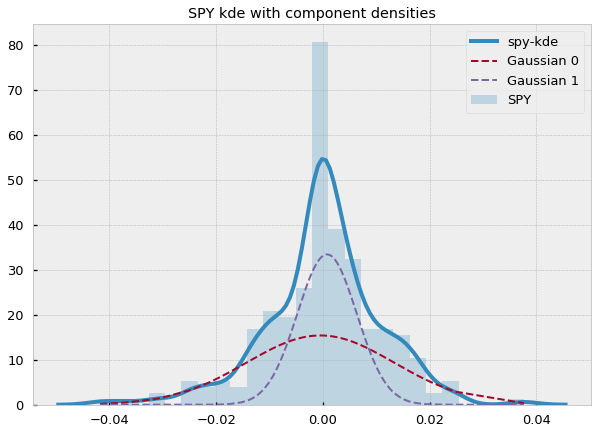

In [21]:
fig, ax = plt.subplots(figsize=(10,7))

# reshape observed returns
x = state_df[sym].sort_values().values.reshape(-1,1)

# agg pdfs into list
agg_pdfs = [w * stats.norm.pdf(x, mu, sd) 
            for mu, sd, w in zip(gmm.means_, np.sqrt(gmm.covariances_), gmm.weights_)]
# sum density in case
summed_density = np.sum(np.array(agg_pdfs), axis=0)

# plot observed data distribution #and a single component gaussian fit aka norm fit
sns.distplot(x, ax=ax, hist=True, hist_kws=dict(alpha=0.25),
             kde=True, kde_kws=dict(lw=4, label='spy-kde'),
             label=sym)

# plot component gaussians  
for i in range(len(agg_pdfs)): ax.plot(x, agg_pdfs[i], ls='--', label=f'Gaussian {i}');  

# ax.plot(x, summed_density, color='k')  
plt.title(f'{sym} kde with component densities')
plt.legend()

Note the difference between the SPY distribution fit with multiple Gaussians vs below with a single Gaussian fit.

## Conclusions

In this chapter we covered the intuition behind Gaussian Mixture Models (GMM) and how they work. We peeled back the curtain and went through a demonstration of the underlying Expectation-Maximization algorithm that underpins GMMs and many other unsupervised algorithms. From there we used `sklearn` to fit a GMM, and how to make a good choice about the optimal number of components to fit. Finally we demonstrated some of the flexibility and variability of GMMs to fit time-varying distributions.

In the next chapter we will experiment with trading strategy design based on using GMMs to fit distributions. We will evaluate how well the GMM fit across multiple ETFs, and then conducting an event study to analyze if there are any tradeable patterns.